In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import movecolumn as mc
from funciones_churn import *
from diccionarios import *

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score,accuracy_score,recall_score,precision_score,f1_score
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


In [2]:
#cargo los ficheros

df=pd.read_csv('data\\df.csv',index_col='customerID')


In [3]:
#guardamos una copia del csv original
dft=df


In [4]:
lista_ori=list(dft.columns)

In [5]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  gender            7043 non-null 

In [6]:
df.head(5)

Unnamed: 0  tenure PhoneService        Contract PaperlessBilling  \
customerID                                                                     
7590-VHVEG           0       1           No  Month-to-month              Yes   
5575-GNVDE           1      34          Yes        One year               No   
3668-QPYBK           2       2          Yes  Month-to-month              Yes   
7795-CFOCW           3      45           No        One year               No   
9237-HQITU           4       2          Yes  Month-to-month              Yes   

                        PaymentMethod  MonthlyCharges TotalCharges  \
customerID                                                           
7590-VHVEG           Electronic check           29.85        29.85   
5575-GNVDE               Mailed check           56.95       1889.5   
3668-QPYBK               Mailed check           53.85       108.15   
7795-CFOCW  Bank transfer (automatic)           42.30      1840.75   
9237-HQITU           Electronic check           70.70       151.65   

               MultipleLines InternetService  ... OnlineBackup  \
customerID                                    ...                
7590-VHVEG  No phone service             DSL  ...          Yes   
5575-GNVDE                No             DSL  ...           No   
3668-QPYBK                No             DSL  ...          Yes   
7795-CFOCW  No phone service             DSL  ...           No   
9237-HQITU                No     Fiber optic  ...           No   

           DeviceProtection TechSupport StreamingTV StreamingMovies  gender  \
customerID                                                                    
7590-VHVEG               No          No          No              No  Female   
5575-GNVDE              Yes          No          No              No    Male   
3668-QPYBK               No          No          No              No    Male   
7795-CFOCW              Yes         Yes          No              No    Male   
9237-HQITU               No          No          No              No  Female   

           SeniorCitizen  Partner Dependents Churn  
customerID                                          
7590-VHVEG             0      Yes         No    No  
5575-GNVDE             0       No         No    No  
3668-QPYBK             0       No         No   Yes  
7795-CFOCW             0       No         No    No  
9237-HQITU             0       No         No   Yes  

[5 rows x 21 columns]

In [7]:
      
data_report(df)

DATA_TYPE  MISSINGS (%)  UNIQUE_VALUES  CARDIN (%)
COL_N                                                              
Unnamed: 0           int64           0.0           7043      100.00
tenure               int64           0.0             73        1.04
PhoneService        object           0.0              2        0.03
Contract            object           0.0              3        0.04
PaperlessBilling    object           0.0              2        0.03
PaymentMethod       object           0.0              4        0.06
MonthlyCharges     float64           0.0           1585       22.50
TotalCharges        object           0.0           6531       92.73
MultipleLines       object           0.0              3        0.04
InternetService     object           0.0              3        0.04
OnlineSecurity      object           0.0              3        0.04
OnlineBackup        object           0.0              3        0.04
DeviceProtection    object           0.0              3        0.04
TechSupport         object           0.0              3        0.04
StreamingTV         object           0.0              3        0.04
StreamingMovies     object           0.0              3        0.04
gender              object           0.0              2        0.03
SeniorCitizen        int64           0.0              2        0.03
Partner             object           0.0              2        0.03
Dependents          object           0.0              2        0.03
Churn               object           0.0              2        0.03

### TRANSFORMACIÓN DE DATOS

In [8]:
df=transfor(df,dict_MultiLine,dict_ONLServ,dict_features)

In [9]:
dfp=df

In [10]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   int64  
 1   PhoneService      7043 non-null   int64  
 2   Contract          7043 non-null   int64  
 3   PaperlessBilling  7043 non-null   int64  
 4   PaymentMethod     7043 non-null   int64  
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   float64
 7   MultipleLines     7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  gender            7043 non-null   int64  
 15  SeniorCitizen     7043 non-null   int64  
 16  Partner           7043 non-null 

### EDA

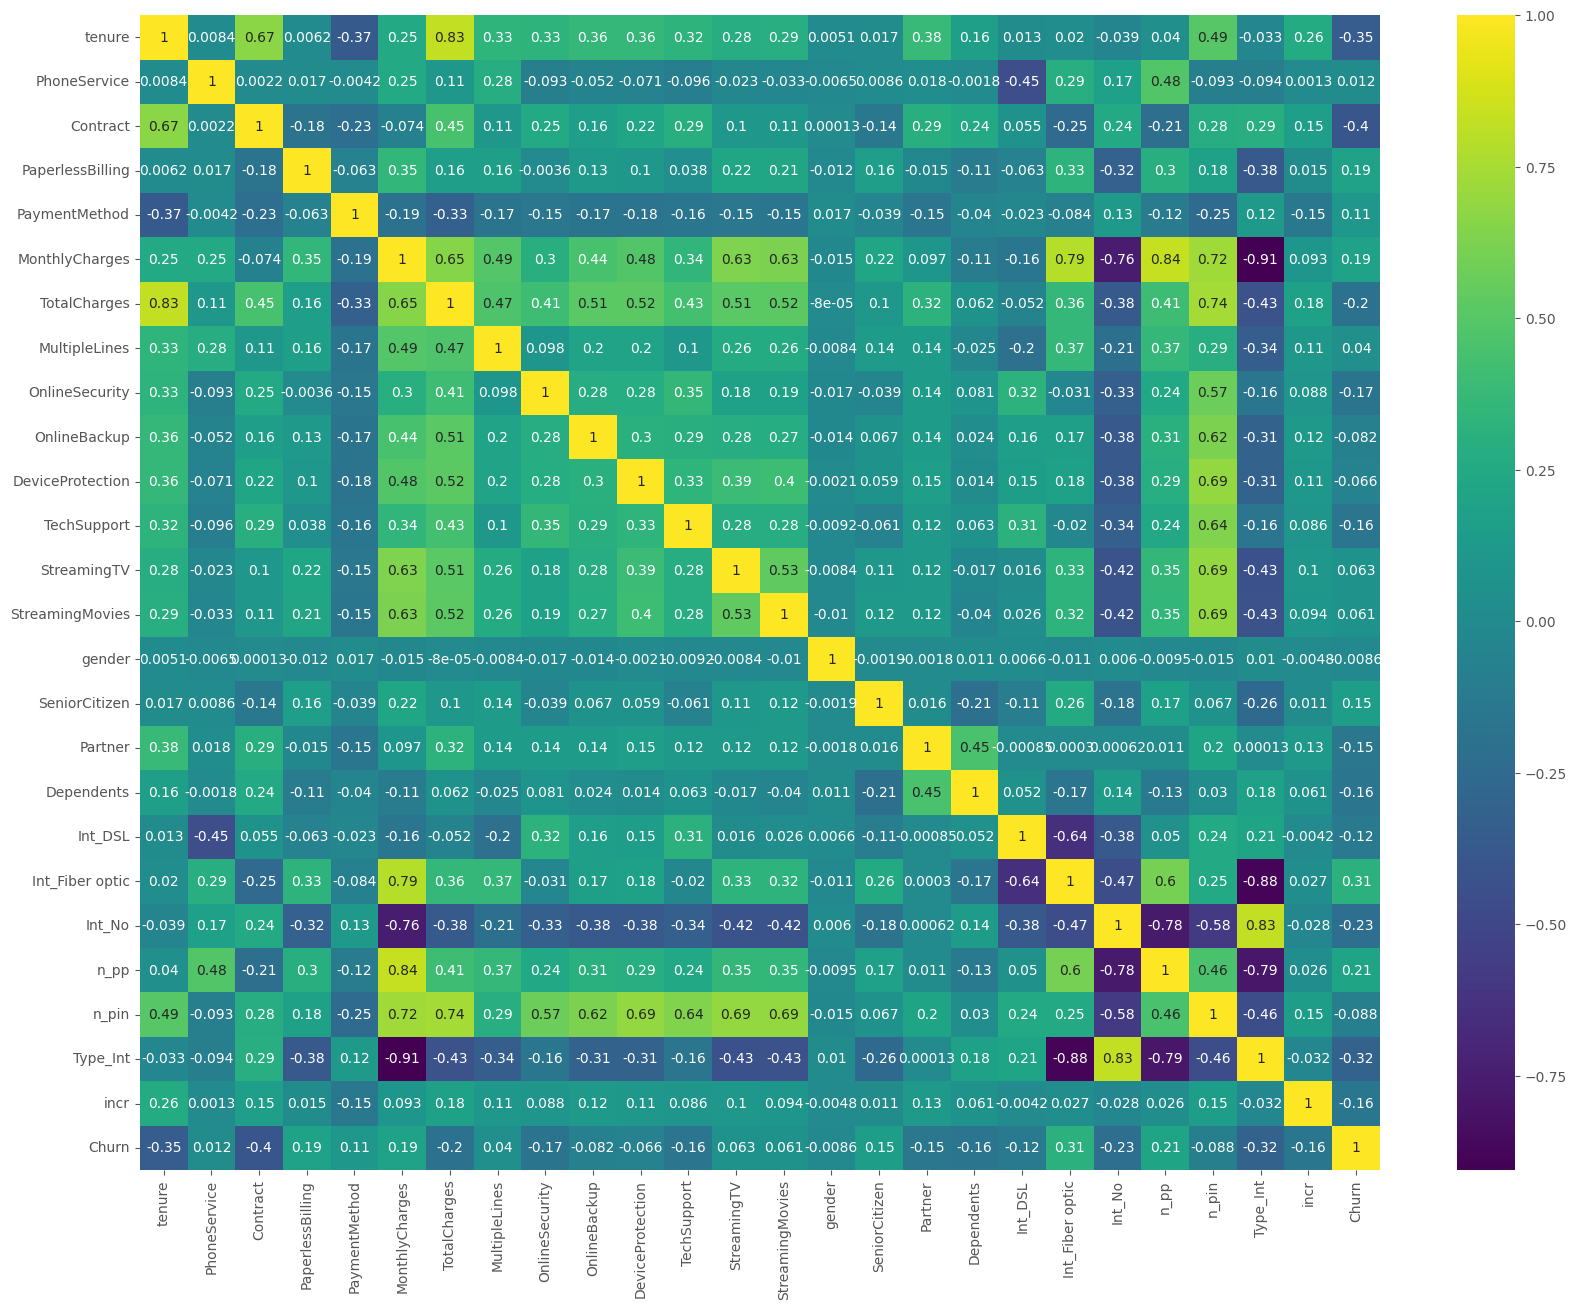

In [11]:
plt.figure(figsize=(20,15))

sns.heatmap(df.corr(),annot=True, cmap='viridis');

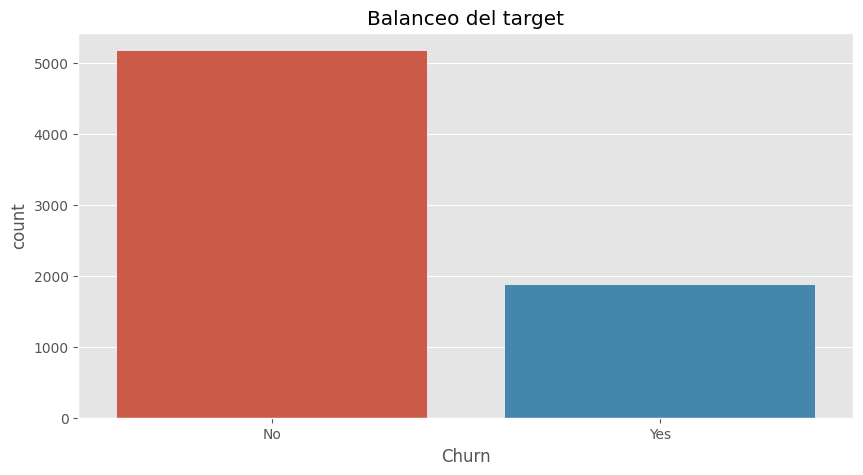

In [12]:

fig, axes = plt.subplots(1, 1, figsize=(10, 5))

sns.countplot(x='Churn',data=dft)
axes.set_title("Balanceo del target");

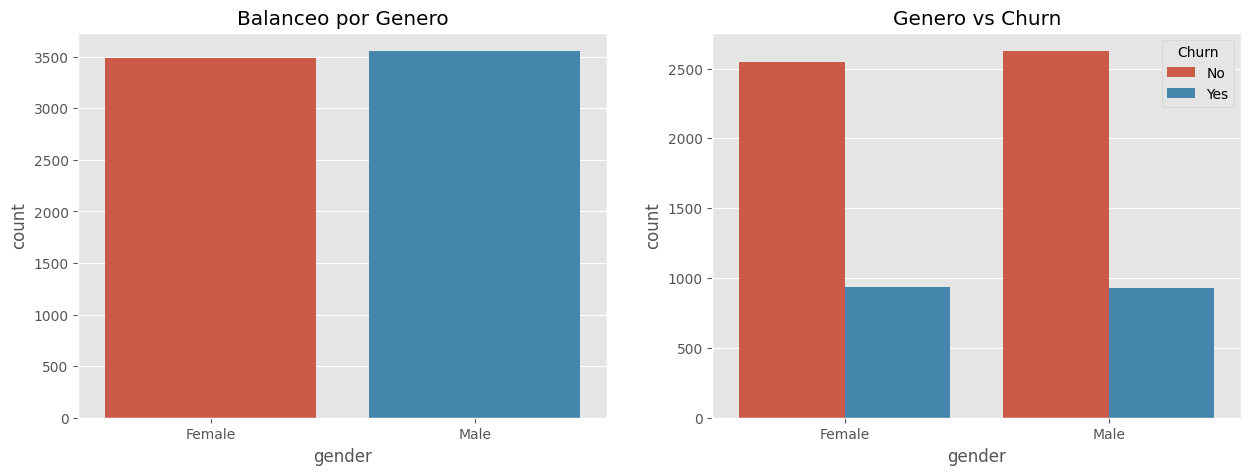

In [13]:


fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Conteo de categorica
sns.countplot(x=dft["gender"], ax=axes[0])
axes[0].set_title("Balanceo por Genero")

# Categorica vs target
sns.countplot(x=dft["gender"], hue=dft['Churn'], ax=axes[1], dodge=True)
axes[1].set_title("Genero vs Churn");

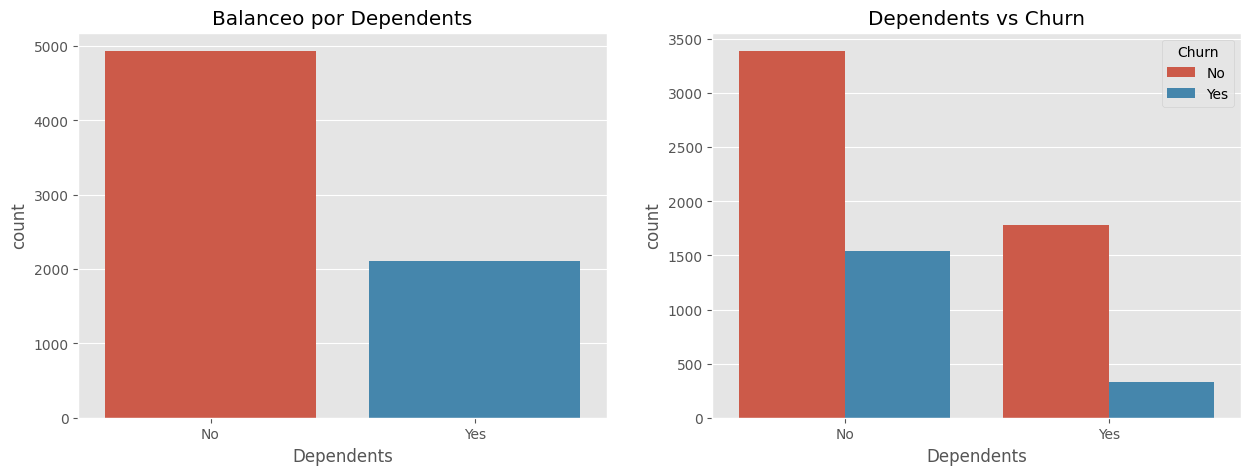

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Conteo de categorica
sns.countplot(x=dft["Dependents"], ax=axes[0])
axes[0].set_title("Balanceo por Dependents")

# Categorica vs target
sns.countplot(x=dft["Dependents"], hue=dft['Churn'], ax=axes[1], dodge=True)
axes[1].set_title("Dependents vs Churn");

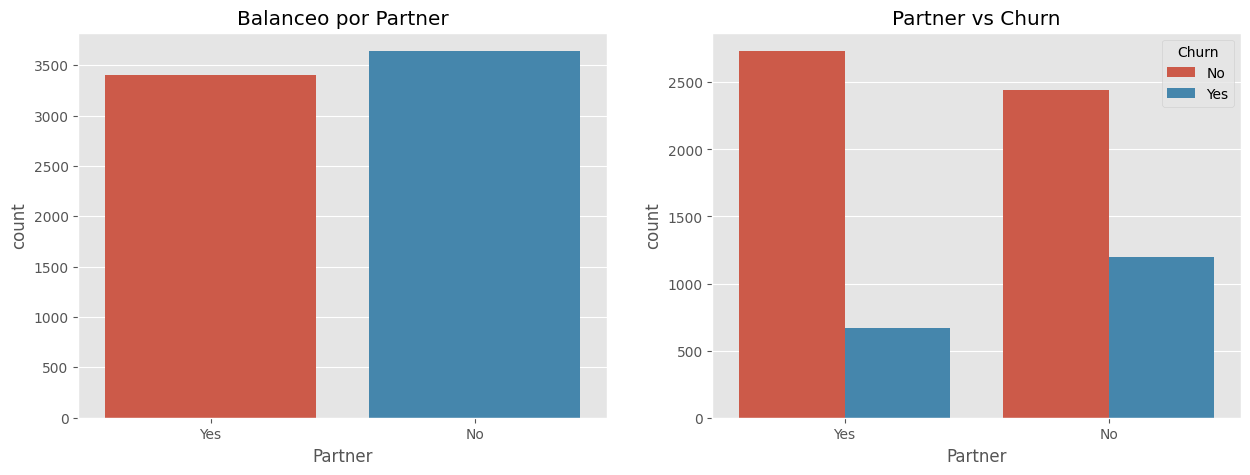

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Conteo de categorica
sns.countplot(x=dft["Partner"], ax=axes[0])
axes[0].set_title("Balanceo por Partner")

# Categorica vs target
sns.countplot(x=dft["Partner"], hue=dft['Churn'], ax=axes[1], dodge=True)
axes[1].set_title("Partner vs Churn");

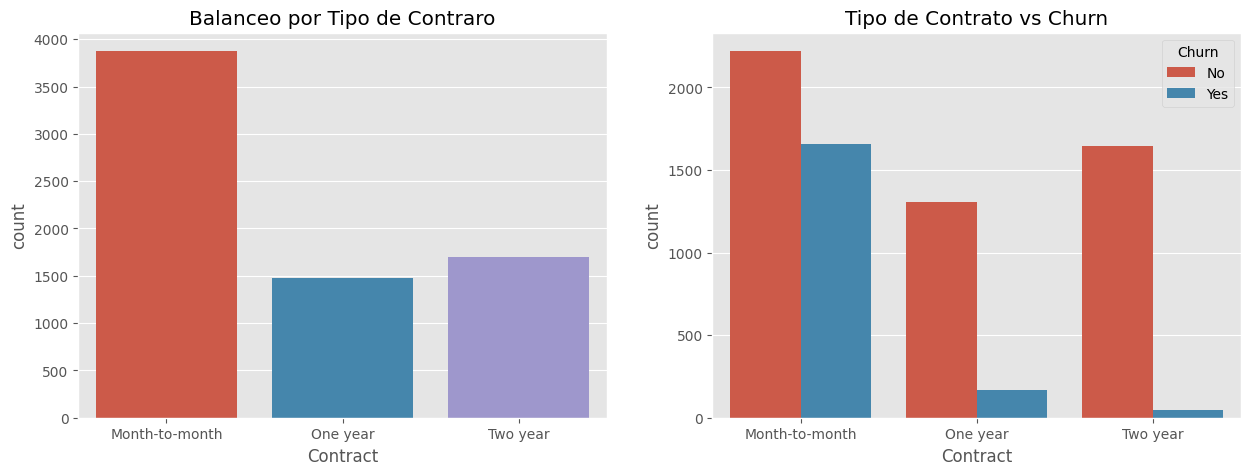

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Conteo de categorica
sns.countplot(x=dft["Contract"], ax=axes[0])
axes[0].set_title("Balanceo por Tipo de Contraro")

# Categorica vs target
sns.countplot(x=dft["Contract"], hue=dft['Churn'], ax=axes[1], dodge=True)
axes[1].set_title("Tipo de Contrato vs Churn");

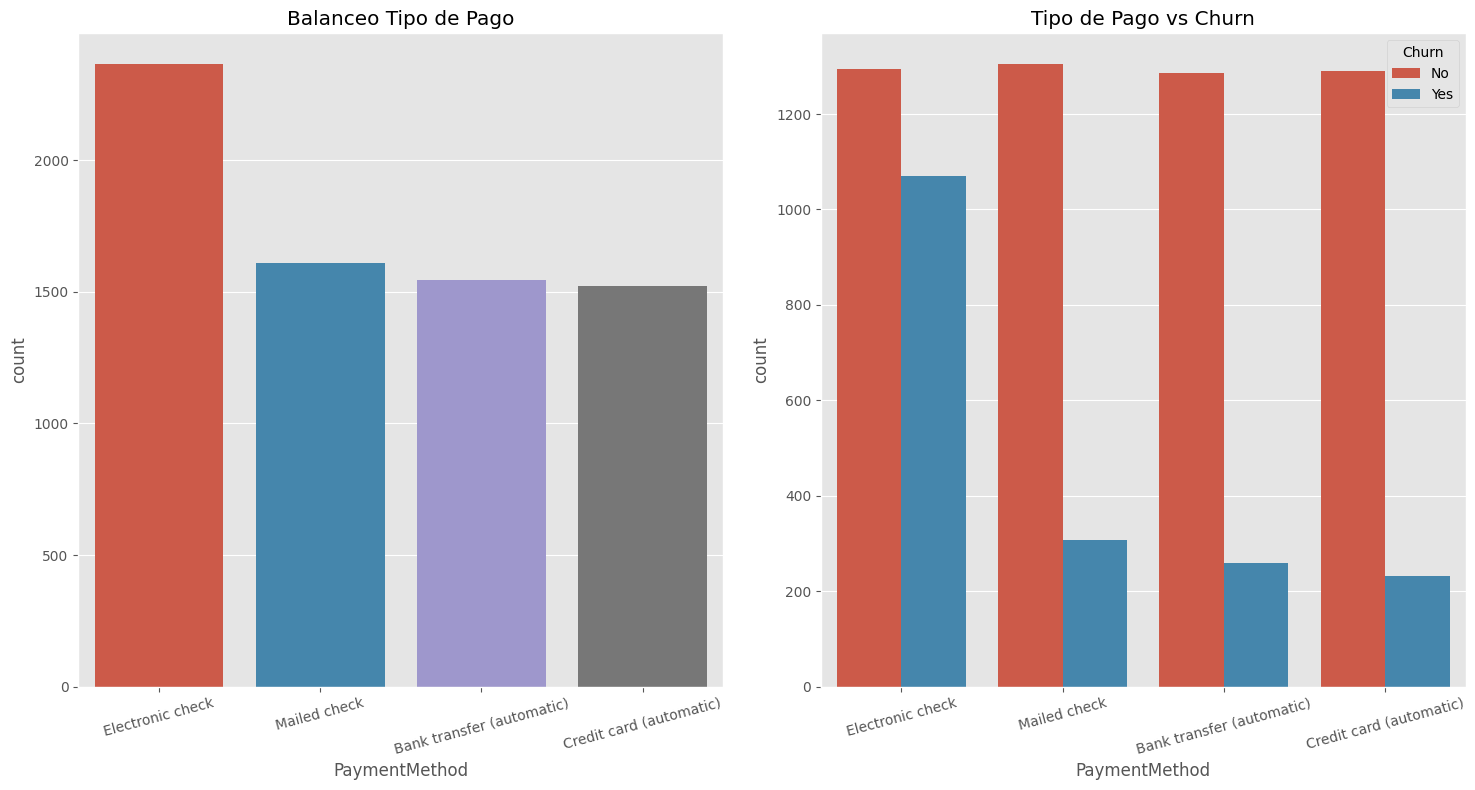

''

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))

# Conteo de categorica
sns.countplot(x=dft["PaymentMethod"], ax=axes[0])

axes[0].set_title("Balanceo Tipo de Pago")

# Categorica vs target
sns.countplot(x=dft["PaymentMethod"], hue=dft['Churn'], ax=axes[1], dodge=True)

axes[1].set_title("Tipo de Pago vs Churn")

for ax in axes:
    ax.tick_params(axis='x',rotation=15)
plt.tight_layout()
plt.show()
;

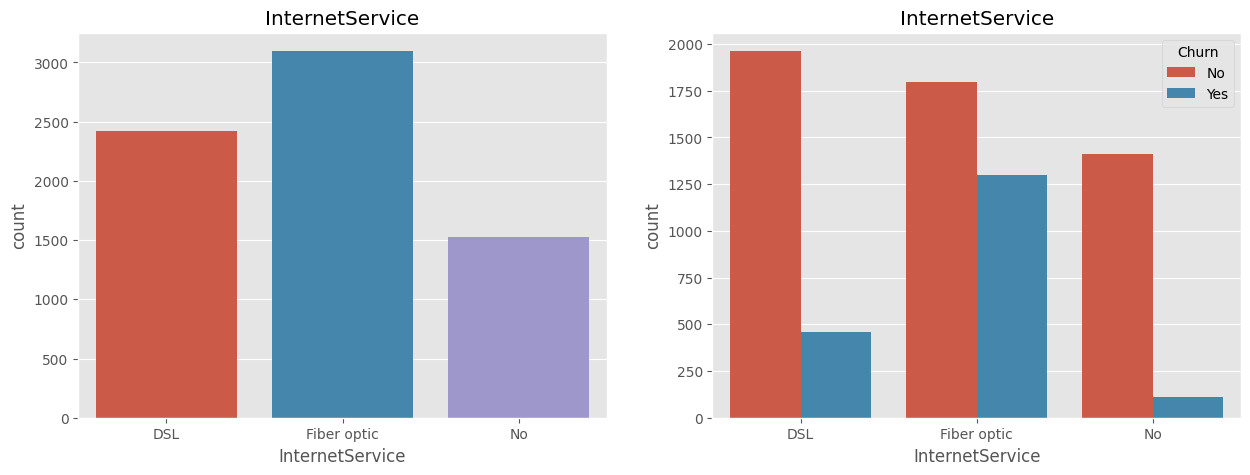

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Conteo de categorica
sns.countplot(x=dft["InternetService"], ax=axes[0])
axes[0].set_title("InternetService")

# Categorica vs target
sns.countplot(x=dft["InternetService"], hue=dft['Churn'], ax=axes[1], dodge=True)
axes[1].set_title("InternetService");

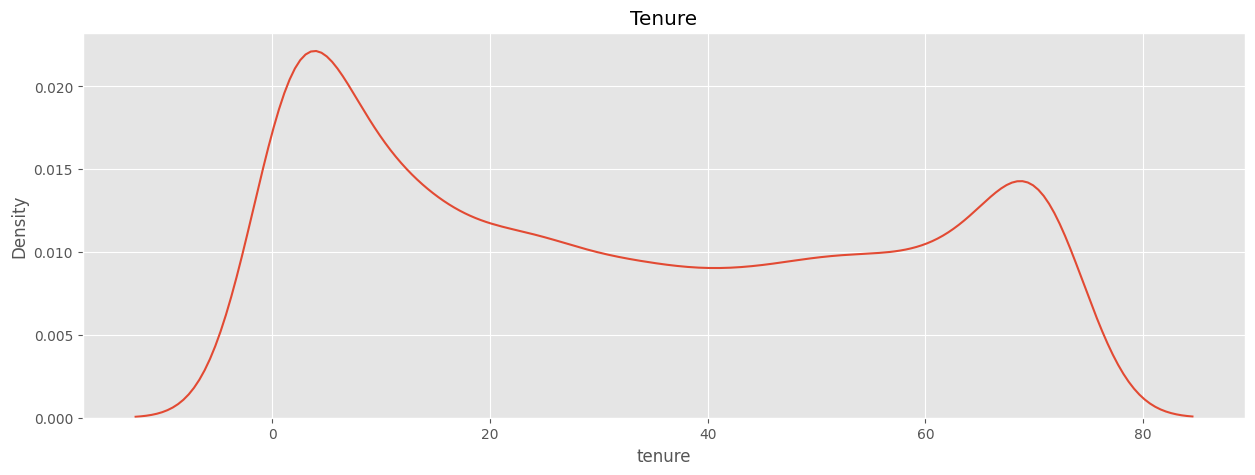

In [19]:
# Funcion de densidad + target
temp=df

fig, axes = plt.subplots(1, 1, figsize=(15, 5))
sns.kdeplot(data=temp, x='tenure')
axes.set_title("Tenure");

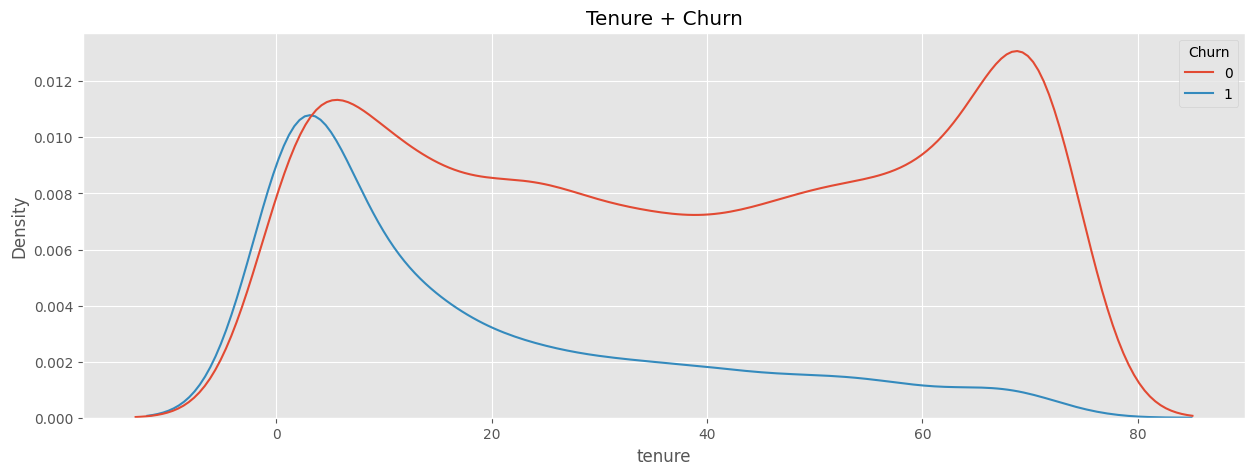

In [20]:
# Funcion de densidad + target
temp=df

fig, axes = plt.subplots(1, 1, figsize=(15, 5))
sns.kdeplot(data=temp, x='tenure', hue = 'Churn')
axes.set_title("Tenure + Churn");

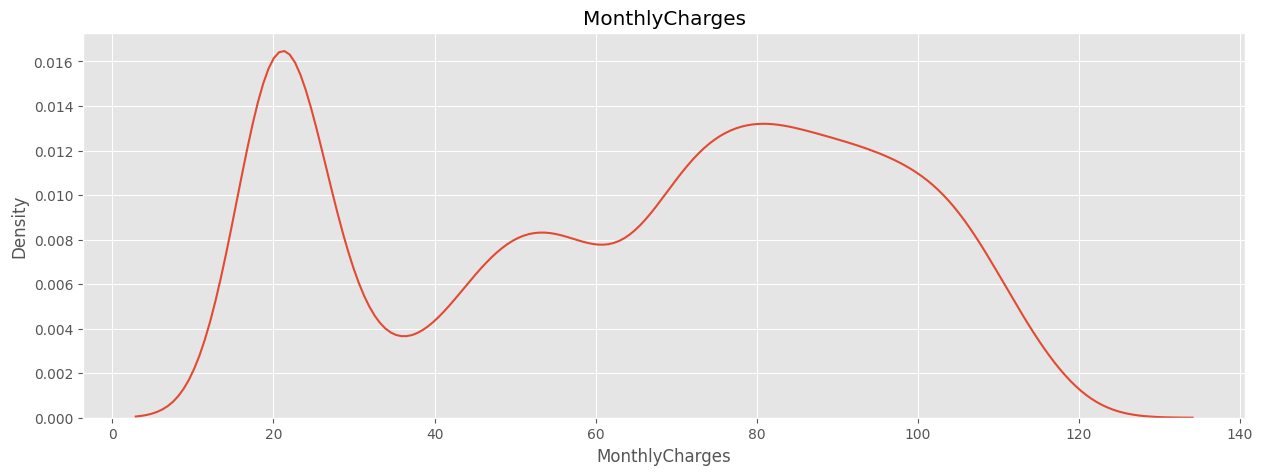

In [21]:
# Funcion de densidad + target
temp=df

fig, axes = plt.subplots(1, 1, figsize=(15, 5))
sns.kdeplot(data=temp, x='MonthlyCharges')
axes.set_title("MonthlyCharges");

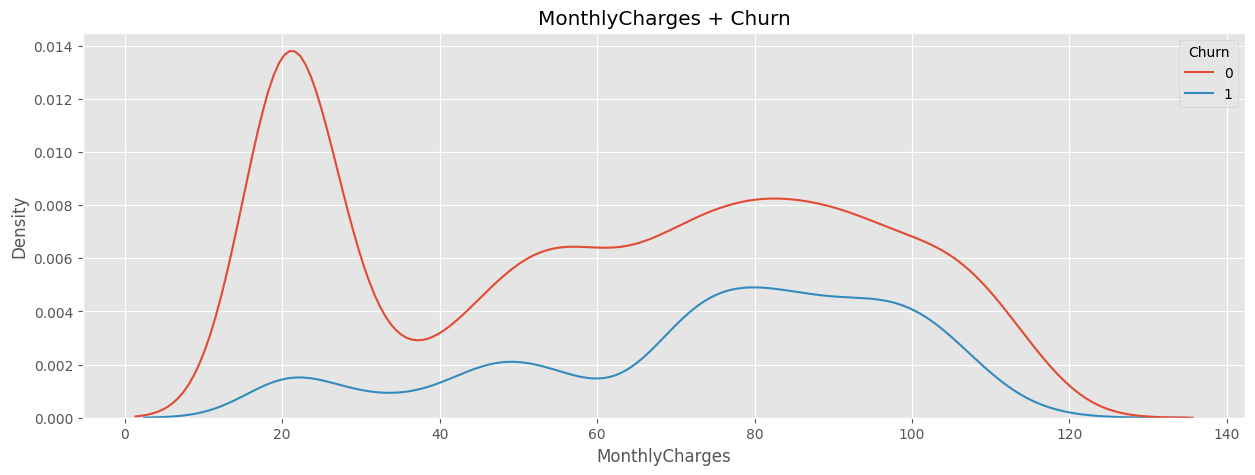

In [22]:
# Funcion de densidad + target
temp=df

fig, axes = plt.subplots(1, 1, figsize=(15, 5))
sns.kdeplot(data=temp, x='MonthlyCharges', hue = 'Churn')
axes.set_title("MonthlyCharges + Churn");

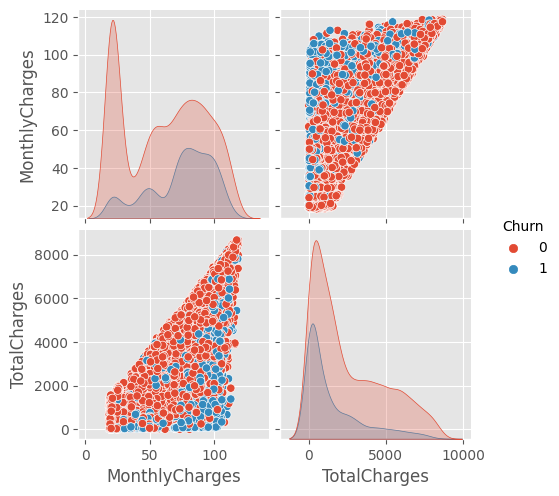

In [23]:
# Variables numericas vs target categórico


temp=df.loc[:,['MonthlyCharges','TotalCharges','Churn']]

sns.pairplot(temp,
            kind='scatter',
            hue='Churn');

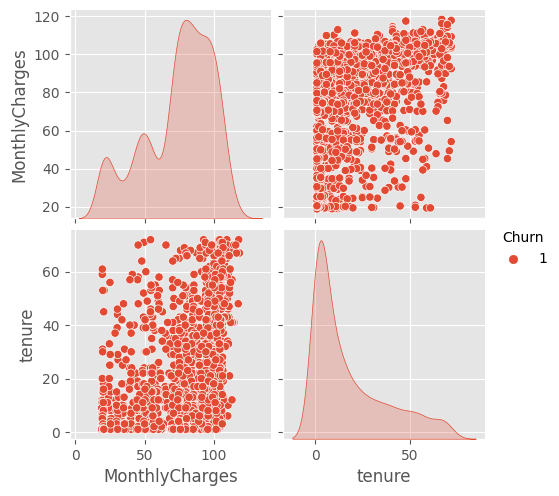

In [24]:
# Variables numericas vs target categórico


temp=df[df['Churn']==1].loc[:,['MonthlyCharges','tenure','Churn']]
sns.pairplot(temp,
            kind='scatter',
            hue='Churn');

### Preproceso

In [25]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1:]

In [26]:

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.2, random_state=8)

In [27]:
df_sam1=pd.concat([X_train,y_train],axis=1)

In [28]:
df_sam=df_sam1[df_sam1['Churn']==1].sample(n=2000,random_state=15,replace=True)

In [29]:
df_sam=pd.concat([df_sam,df])

In [30]:
X_train=df_sam.iloc[:,0:-1]
y_train=df_sam.iloc[:,-1:]

In [31]:

select_feature = SelectKBest(f_classif, k=len(X_train.columns)).fit(X_train, y_train)
selected_features_df = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Scores':select_feature.scores_})
selected_features_df['tipo']=selected_features_df['Feature'].apply(lambda x:'Básica' if x in lista_ori else 'Transformada')
selected_features_df.sort_values(by='Scores', ascending=True,inplace=True)

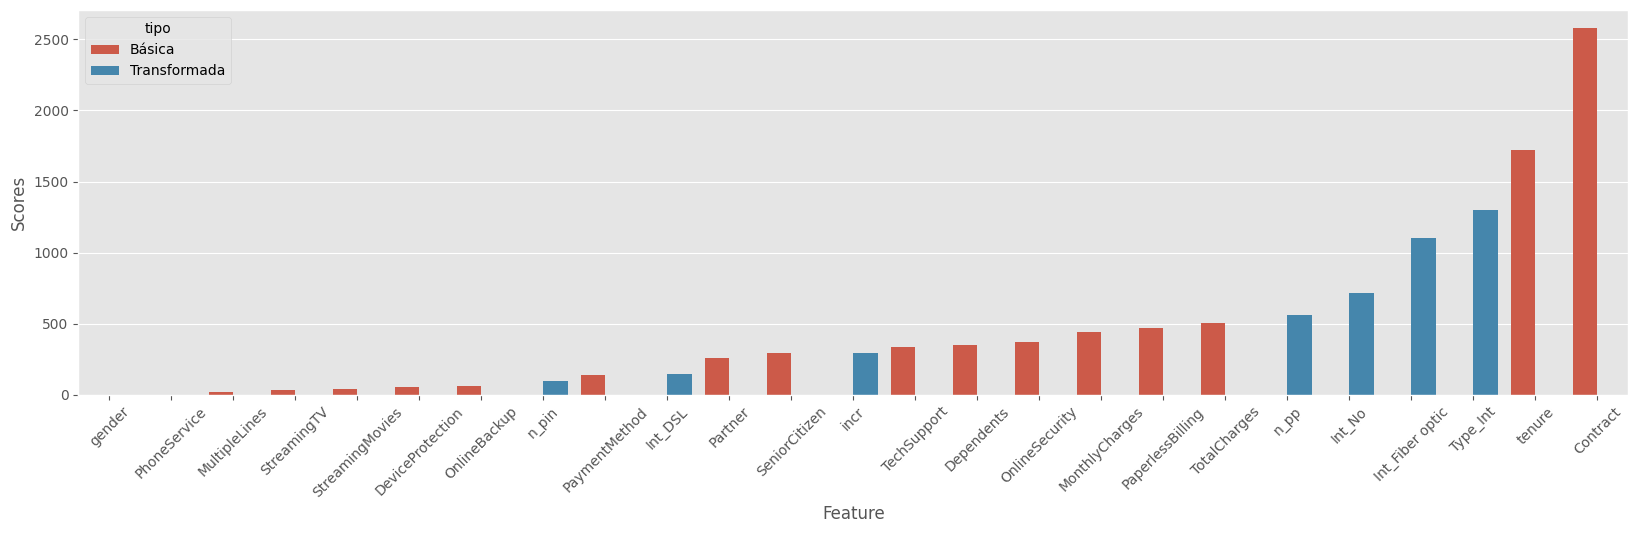

In [32]:
temp=selected_features_df
plt.figure(figsize=(20, 5))
sns.barplot(x="Feature", y="Scores", data=temp,hue='tipo')
plt.xticks(rotation=45)
plt.show()

In [33]:
from sklearn import decomposition
sc = StandardScaler()
pca = decomposition.PCA()
X=df.iloc[:,:-1]
n_components = list(range(1,X.shape[1]+1,1))
dtreeCLF = DecisionTreeClassifier()

In [66]:
reg_log = Pipeline(steps = [
    ("imputer", SimpleImputer()),
    ("selectkbest", SelectKBest()),
    ("scaler", StandardScaler()),
    ("reglog", LogisticRegression())
])
reg_log_param = {
    'selectkbest__k': [18,20,22],
    "imputer__strategy": ['mean', 'median'],
    "reglog__penalty": ['l1', 'l2'],
    "reglog__C": np.logspace(0, 4, 10)}


rfc = Pipeline(steps=[
    ("selectkbest", SelectKBest()),
    ("rfc",RandomForestClassifier())
])

rfc_param = {    
    'selectkbest__score_func':[f_classif],
    'selectkbest__k': [22],
    "rfc__n_estimators": [800],
    "rfc__max_features": [5,9],
    "rfc__max_depth": [2,3,4,5,6],
    'rfc__criterion' : ['gini']
}



svm = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("svm", SVC())
])


svm_param = {
    'selectkbest__k': [22],
    'svm__kernel': ['poly'],
    'svm__C': [0.1],
    'svm__degree': [4],
    'svm__gamma': ['auto']
}

knn = Pipeline(steps = [    
    ("knn_scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("knn", KNeighborsClassifier())
])

knn_param = {
    'selectkbest__k': [22],
    'knn__leaf_size': [30],
    'knn__n_neighbors':[5],
    'knn__p' : [2]

    
}

Dtree = Pipeline(steps = [ 

    ("sc", sc),
    ("pca", pca),
    ("DtreeCLF", DecisionTreeClassifier())
])

Dtree_param = {
    "DtreeCLF__criterion": ["gini", "entropy"], 
    "DtreeCLF__max_depth": [5,6],
    "DtreeCLF__min_samples_leaf": [1]
}

XGB = Pipeline(steps = [ 

    ("XGB_scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("XGB", XGBClassifier())
])

XGB_param = {
        'selectkbest__k': [22],
        'XGB__max_depth': [6,10],
        'XGB__gamma': [ 1,5,9],
        'XGB__reg_alpha' :[ 50,100],
        'XGB__reg_lambda' : [ 1],
        'XGB__colsample_bytree' :[ 1],
        'XGB__min_child_weight' : [1],
        'XGB__n_estimators': [150,180, 250],
        'XGB__seed': [0]
    }
ADA = Pipeline(steps = [ 

    ("ADA_scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("ADA", AdaBoostClassifier())
])

ADA_param = {
        'selectkbest__k': [22],
        'ADA__n_estimators': [100,150,180, 250],
        'ADA__base_estimator': [DecisionTreeClassifier(max_depth=[2,3,4,5])],
        'ADA__random_state':[0]}






In [67]:
gs_reg_log = GridSearchCV(reg_log,
                         reg_log_param,
                         cv = 10,
                         scoring = 'recall',
                         verbose = 1,
                         n_jobs = -1)


gs_rfc = GridSearchCV(rfc,
                         rfc_param,
                         cv = 10,
                         scoring = 'recall',
                         verbose = 1,
                         n_jobs = -1)

gs_svm = GridSearchCV(svm,
                         svm_param,
                         cv = 10,
                         scoring = 'recall',
                         verbose = 1,
                         n_jobs = -1)

gs_knn = GridSearchCV(knn,
                         knn_param,
                         cv = 10,
                         scoring = 'recall',
                         verbose = 1,
                         n_jobs = -1)

gs_Dtree = GridSearchCV(Dtree,
                         Dtree_param,
                         cv = 10,
                         scoring = 'recall',
                         verbose = 1,
                         n_jobs = -1)

gs_XGB = GridSearchCV(XGB,
                         XGB_param,
                         cv = 10,
                         scoring = 'recall',
                         verbose = 1,
                         n_jobs = -1)

gs_ADA = GridSearchCV(ADA,
                         ADA_param,
                         cv = 10,
                         scoring = 'recall',
                         verbose = 1,
                         n_jobs = -1)


In [68]:
grids = {#"gs_reg_log": gs_reg_log,
        #"gs_rfc": gs_rfc,
        #"gs_svm": gs_svm,
        #"gs_knn": gs_knn,
        #"gs_dtree": gs_Dtree,
        #"gs_XGB": gs_XGB,
        "gs_ADA": gs_XGB,     
             
        
        }

In [69]:
for nombre, grid_search in grids.items():
    grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


KeyboardInterrupt: 

In [63]:
for nombre, grid_search in grids.items():
    print(f'{nombre} recall de {grid_search.best_score_}\n')

gs_XGB recall de 0.7497978337416824



In [64]:
for nombre, grid_search in grids.items():
    print(f'{nombre} tiene como mejor estimador {grid_search.best_estimator_}\n')
    print(f'con los parametros {grid_search.best_params_}\n')
    predictions = grid_search.predict(X_test)
    print(accuracy_score(y_test, predictions))

gs_XGB tiene como mejor estimador Pipeline(steps=[('XGB_scaler', StandardScaler()),
                ('selectkbest', SelectKBest()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=5, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=150, n_jobs=0, num_parallel_tree=1,
          

In [ ]:
'''print(gs_rfc.best_score_)
print(gs_rfc.best_params_)
print(gs_rfc.best_estimator_)'''

'print(gs_rfc.best_score_)\nprint(gs_rfc.best_params_)\nprint(gs_rfc.best_estimator_)'

In [ ]:

'''df_test=pd.read_csv('data\\X_test.csv',index_col='customerID')'''


"df_test=pd.read_csv('data\\X_test.csv',index_col='customerID')"

In [ ]:
'''y_test=pd.read_csv('data\\y_test.csv')'''

"y_test=pd.read_csv('data\\y_test.csv')"

In [ ]:
'''X_test=transfor(df_test,dict_MultiLine,dict_ONLServ,dict_features)'''

'X_test=transfor(df_test,dict_MultiLine,dict_ONLServ,dict_features)'

In [ ]:
predictions = grid_search.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7097232079489


In [ ]:
recall_score(y_test, predictions)

0.8021390374331551

In [ ]:
'''precision_score(y_test, predictions)'''

'precision_score(y_test, predictions)'

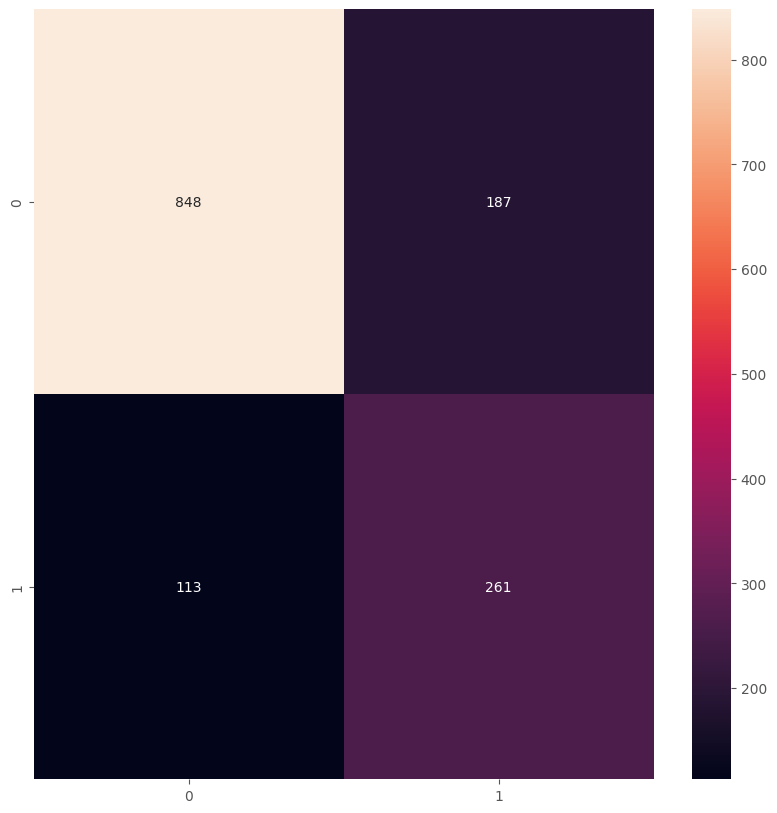

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True , fmt=".0f");

In [ ]:
'''import pickle

with open('PMLJavierL', 'wb') as archivo_salida:
    pickle.dump(gs_rfc, archivo_salida)

archivo_salida.close()'''

"import pickle\n\nwith open('PMLJavierL', 'wb') as archivo_salida:\n    pickle.dump(gs_rfc, archivo_salida)\n\narchivo_salida.close()"

In [ ]:
'''X_test.to_csv('data\\X_test.csv',index=False)
y_test.to_csv('data\\y_test.csv',index=False)'''

"X_test.to_csv('data\\X_test.csv',index=False)\ny_test.to_csv('data\\y_test.csv',index=False)"

In [ ]:
'''import pickle
with open('PMLJavierL', 'rb') as archivo_entrada:
    loaded_model = pickle.load(archivo_entrada)'''

"import pickle\nwith open('PMLJavierL', 'rb') as archivo_entrada:\n    loaded_model = pickle.load(archivo_entrada)"

In [ ]:
'''X_test=pd.read_csv('data\\X_test.csv')'''

"X_test=pd.read_csv('data\\X_test.csv')"

In [ ]:
'''loaded_model.predict(X_test)'''

'loaded_model.predict(X_test)'